In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [4]:
train.head()

,Property_ID,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
0,0x21e3,Apartment,106,NaN,1,Semi_Furnished,0.0,No,Once in a day - Morning,5.89,Slightly below average,Medium,90.0,3.86,71.98
1,0x68d4,Apartment,733,2.0,2,Unfurnished,1.0,No,Once in a day - Evening,4.37,Well below average,Medium,96.0,3.55,71.20
2,0x7d81,Apartment,737,4.0,2,Fully Furnished,0.0,No,Once in a day - Morning,7.45,Slightly below average,Medium,121.0,3.81,71.39
3,0x7a57,Apartment,900,3.0,2,Unfurnished,2.0,Yes,Once in a day - Morning,6.16,Well above average,Medium,100.0,1.34,31.46
4,0x9409,Bungalow,2238,14.0,6,Fully Furnished,0.0,No,All time,5.46,Well below average,Medium,116.0,4.77,93.70


In [5]:
train.shape

(39499, 15)

In [6]:
test.head()

,Property_ID,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review
0,0x6e93,Apartment,293,3.0,1,Unfurnished,0.0,No,Once in a day - Morning,7.28,Well above average,Medium,152.0,2.52
1,0x8787,Apartment,586,4.0,1,Semi_Furnished,0.0,No,Once in a day - Evening,7.63,Well below average,Medium,92.0,4.16
2,0x6c17,Container Home,305,1.0,2,Semi_Furnished,1.0,No,All time,5.39,Slightly above average,Medium,90.0,2.92
3,0x9dbd,Apartment,258,2.0,1,Semi_Furnished,1.0,No,All time,7.53,Slightly below average,Medium,158.0,3.45
4,0xbfde,Bungalow,3031,12.0,4,Fully Furnished,0.0,No,All time,8.79,Well above average,High,186.0,2.72


In [7]:
test.shape

(10500, 14)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39499 entries, 0 to 39498
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Property_ID             39499 non-null  object 
 1   Property_Type           39499 non-null  object 
 2   Property_Area           39499 non-null  int64  
 3   Number_of_Windows       37845 non-null  float64
 4   Number_of_Doors         39499 non-null  int64  
 5   Furnishing              38457 non-null  object 
 6   Frequency_of_Powercuts  38116 non-null  float64
 7   Power_Backup            39499 non-null  object 
 8   Water_Supply            39499 non-null  object 
 9   Traffic_Density_Score   39499 non-null  float64
 10  Crime_Rate              38712 non-null  object 
 11  Dust_and_Noise          38280 non-null  object 
 12  Air_Quality_Index       39499 non-null  float64
 13  Neighborhood_Review     39499 non-null  float64
 14  Habitability_score      39499 non-null

In [9]:
train.isnull().sum()/train.shape[0]*100

Property_ID               0.000000
Property_Type             0.000000
Property_Area             0.000000
Number_of_Windows         4.187448
Number_of_Doors           0.000000
Furnishing                2.638041
Frequency_of_Powercuts    3.501354
Power_Backup              0.000000
Water_Supply              0.000000
Traffic_Density_Score     0.000000
Crime_Rate                1.992456
Dust_and_Noise            3.086154
Air_Quality_Index         0.000000
Neighborhood_Review       0.000000
Habitability_score        0.000000
dtype: float64

In [10]:
train=train.fillna(0)

In [11]:
test=test.fillna(0)

In [12]:
train.isnull().sum()/train.shape[0]*100

Property_ID               0.0
Property_Type             0.0
Property_Area             0.0
Number_of_Windows         0.0
Number_of_Doors           0.0
Furnishing                0.0
Frequency_of_Powercuts    0.0
Power_Backup              0.0
Water_Supply              0.0
Traffic_Density_Score     0.0
Crime_Rate                0.0
Dust_and_Noise            0.0
Air_Quality_Index         0.0
Neighborhood_Review       0.0
Habitability_score        0.0
dtype: float64

In [13]:
train.duplicated().sum()

0

In [14]:
#categorical features
categorical = train.select_dtypes(include =[np.object])
print("Categorical Features in DataSet:",categorical.shape[1])
print(categorical.columns)

#numerical features
numerical= train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in DataSet:",numerical.shape[1])
print(numerical.columns)

Categorical Features in DataSet: 7
Index(['Property_ID', 'Property_Type', 'Furnishing', 'Power_Backup',
       'Water_Supply', 'Crime_Rate', 'Dust_and_Noise'],
      dtype='object')
Numerical Features in DataSet: 8
Index(['Property_Area', 'Number_of_Windows', 'Number_of_Doors',
       'Frequency_of_Powercuts', 'Traffic_Density_Score', 'Air_Quality_Index',
       'Neighborhood_Review', 'Habitability_score'],
      dtype='object')


In [18]:
categorical=categorical.drop('Property_ID',axis=1)

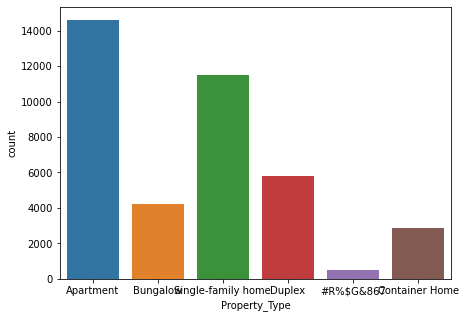

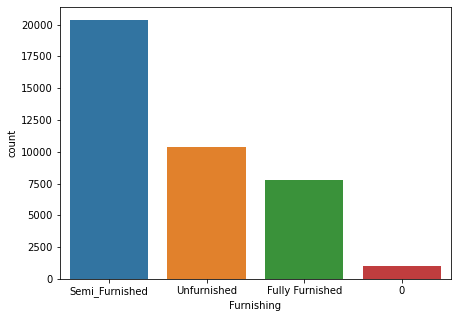

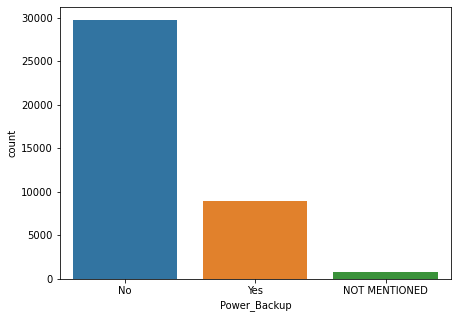

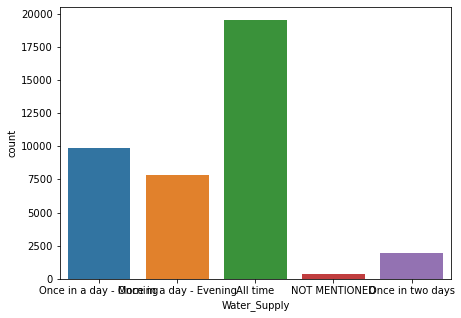

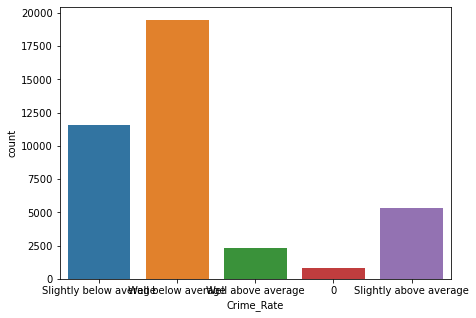

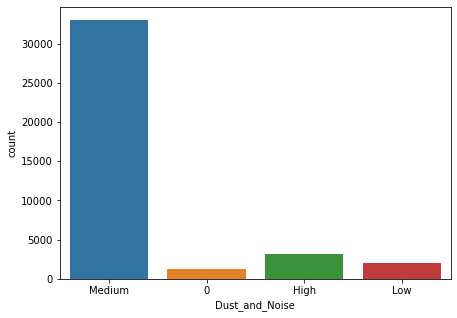

In [19]:
for i in categorical.columns:
    plt.figure(figsize=(7,5))
    sns.countplot(train[i])

<AxesSubplot:xlabel='Habitability_score', ylabel='Density'>

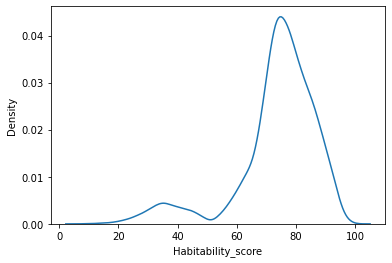

In [21]:
sns.kdeplot(train['Habitability_score'])

In [17]:
train['Property_Type'].value_counts()

Apartment             14596
Single-family home    11477
Duplex                 5806
Bungalow               4238
Container Home         2872
#R%$G&867               510
Name: Property_Type, dtype: int64

In [18]:
train=pd.get_dummies(train,columns=['Property_Type'],drop_first=True)
test=pd.get_dummies(test,columns=['Property_Type'],drop_first=True)

In [19]:
train['Furnishing'].value_counts()

Semi_Furnished     20357
Unfurnished        10344
Fully Furnished     7756
0                   1042
Name: Furnishing, dtype: int64

In [20]:
train['Furnishing'].replace({'Unfurnished':1, 'Semi_Furnished':2, 'Fully Furnished':3}, inplace= True)
test['Furnishing'].replace({'Unfurnished':1, 'Semi_Furnished':2, 'Fully Furnished':3}, inplace= True)

In [21]:
train['Power_Backup'].value_counts()

No               29714
Yes               8957
NOT MENTIONED      828
Name: Power_Backup, dtype: int64

In [22]:
train['Power_Backup'].replace({'NOT MENTIONED':0, 'No':1, 'Yes':2}, inplace= True)
test['Power_Backup'].replace({'NOT MENTIONED':0, 'No':1, 'Yes':2}, inplace= True)

In [23]:
train['Water_Supply'].value_counts()

All time                   19511
Once in a day - Morning     9897
Once in a day - Evening     7815
Once in two days            1931
NOT MENTIONED                345
Name: Water_Supply, dtype: int64

In [24]:
train['Water_Supply'].replace({'All time':4, 'Once in a day - Morning':3, 'Once in a day - Evening':2,'Once in two days':1,'NOT MENTIONED':0}, inplace= True)
test['Water_Supply'].replace({'All time':4, 'Once in a day - Morning':3, 'Once in a day - Evening':2,'Once in two days':1,'NOT MENTIONED':0}, inplace= True)

In [25]:
train['Crime_Rate'].value_counts()

Well below average        19472
Slightly below average    11580
Slightly above average     5303
Well above average         2357
0                           787
Name: Crime_Rate, dtype: int64

In [26]:
train['Crime_Rate'].replace({'Well below average':4, 'Slightly below average':3, 'Slightly above average':2,'Well above average':1}, inplace= True)
test['Crime_Rate'].replace({'Well below average':4, 'Slightly below average':3, 'Slightly above average':2,'Well above average':1}, inplace= True)

In [27]:
train['Dust_and_Noise'].value_counts()

Medium    32996
High       3212
Low        2072
0          1219
Name: Dust_and_Noise, dtype: int64

In [28]:
train['Dust_and_Noise'].replace({'High':1, 'Medium':2, 'Low':3}, inplace= True)
test['Dust_and_Noise'].replace({'High':1, 'Medium':2, 'Low':3}, inplace= True)

In [29]:
train.head()

,Property_ID,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score,Property_Type_Apartment,Property_Type_Bungalow,Property_Type_Container Home,Property_Type_Duplex,Property_Type_Single-family home
0,0x21e3,106,0.0,1,2,0.0,1,3,5.89,3,2,90.0,3.86,71.98,1,0,0,0,0
1,0x68d4,733,2.0,2,1,1.0,1,2,4.37,4,2,96.0,3.55,71.20,1,0,0,0,0
2,0x7d81,737,4.0,2,3,0.0,1,3,7.45,3,2,121.0,3.81,71.39,1,0,0,0,0
3,0x7a57,900,3.0,2,1,2.0,2,3,6.16,1,2,100.0,1.34,31.46,1,0,0,0,0
4,0x9409,2238,14.0,6,3,0.0,1,4,5.46,4,2,116.0,4.77,93.70,0,1,0,0,0


In [30]:
test.head()

,Property_ID,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Property_Type_Apartment,Property_Type_Bungalow,Property_Type_Container Home,Property_Type_Duplex,Property_Type_Single-family home
0,0x6e93,293,3.0,1,1,0.0,1,3,7.28,1,2,152.0,2.52,1,0,0,0,0
1,0x8787,586,4.0,1,2,0.0,1,2,7.63,4,2,92.0,4.16,1,0,0,0,0
2,0x6c17,305,1.0,2,2,1.0,1,4,5.39,2,2,90.0,2.92,0,0,1,0,0
3,0x9dbd,258,2.0,1,2,1.0,1,4,7.53,3,2,158.0,3.45,1,0,0,0,0
4,0xbfde,3031,12.0,4,3,0.0,1,4,8.79,1,1,186.0,2.72,0,1,0,0,0


In [31]:
X=train.drop(columns=['Property_ID','Habitability_score'],axis=1)
y=train['Habitability_score']

In [32]:
Property_ID= test['Property_ID']
test=test.drop('Property_ID',axis=1)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size = 0.15, random_state = 1)

In [35]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [36]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRFRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score, mean_squared_error

In [38]:
regressors = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), 
              ExtraTreeRegressor(),HistGradientBoostingRegressor(),XGBRFRegressor(n_estimators=500, max_depth=12, eta=0.1, subsample=0.7, colsample_bytree=0.8),CatBoostRegressor(),AdaBoostRegressor(),XGBRegressor()]
names = ['Linear_Regression', 'DecisionTree', 'Random_Forest','ExtraTree', 'HistGradientBoosting','XGboostRF','catboost','adaboost','xgboost']

In [39]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.5357410927761286

In [40]:

model_dict = {}
for name, reg in zip(names, regressors):
    
    # training
    reg.fit(x_train, y_train)
    
    # accuracy
    score = reg.score(x_test, y_test)
    model_dict[name] = [r2_score(y_test.values, reg.predict(x_test)), mean_squared_error(y_test.values, reg.predict(x_test)) ]

Learning rate set to 0.071333
0:	learn: 13.4891373	total: 194ms	remaining: 3m 13s
1:	learn: 12.8903133	total: 201ms	remaining: 1m 40s
2:	learn: 12.3494834	total: 208ms	remaining: 1m 9s
3:	learn: 11.8690445	total: 216ms	remaining: 53.7s
4:	learn: 11.4182534	total: 223ms	remaining: 44.5s
5:	learn: 11.0128051	total: 231ms	remaining: 38.2s
6:	learn: 10.6412242	total: 238ms	remaining: 33.8s
7:	learn: 10.3052255	total: 246ms	remaining: 30.5s
8:	learn: 10.0039583	total: 253ms	remaining: 27.9s
9:	learn: 9.7282293	total: 261ms	remaining: 25.8s
10:	learn: 9.4747277	total: 268ms	remaining: 24.1s
11:	learn: 9.2455531	total: 277ms	remaining: 22.8s
12:	learn: 9.0409741	total: 285ms	remaining: 21.6s
13:	learn: 8.8532119	total: 293ms	remaining: 20.6s
14:	learn: 8.6830056	total: 300ms	remaining: 19.7s
15:	learn: 8.5159059	total: 307ms	remaining: 18.9s
16:	learn: 8.3828819	total: 314ms	remaining: 18.2s
17:	learn: 8.2569935	total: 322ms	remaining: 17.6s
18:	learn: 8.1467761	total: 330ms	remaining: 17s
19

185:	learn: 6.1795779	total: 1.94s	remaining: 8.51s
186:	learn: 6.1768382	total: 1.96s	remaining: 8.51s
187:	learn: 6.1741676	total: 1.96s	remaining: 8.49s
188:	learn: 6.1727935	total: 1.97s	remaining: 8.46s
189:	learn: 6.1683708	total: 1.98s	remaining: 8.44s
190:	learn: 6.1647380	total: 1.99s	remaining: 8.41s
191:	learn: 6.1615957	total: 1.99s	remaining: 8.39s
192:	learn: 6.1598924	total: 2s	remaining: 8.37s
193:	learn: 6.1578502	total: 2.01s	remaining: 8.34s
194:	learn: 6.1569771	total: 2.01s	remaining: 8.31s
195:	learn: 6.1546771	total: 2.02s	remaining: 8.29s
196:	learn: 6.1520362	total: 2.03s	remaining: 8.27s
197:	learn: 6.1506727	total: 2.04s	remaining: 8.24s
198:	learn: 6.1487631	total: 2.04s	remaining: 8.22s
199:	learn: 6.1453577	total: 2.05s	remaining: 8.2s
200:	learn: 6.1409718	total: 2.06s	remaining: 8.18s
201:	learn: 6.1384591	total: 2.06s	remaining: 8.15s
202:	learn: 6.1374362	total: 2.07s	remaining: 8.13s
203:	learn: 6.1349095	total: 2.08s	remaining: 8.11s
204:	learn: 6.13

366:	learn: 5.8775408	total: 3.47s	remaining: 5.99s
367:	learn: 5.8769465	total: 3.49s	remaining: 5.99s
368:	learn: 5.8753737	total: 3.49s	remaining: 5.97s
369:	learn: 5.8747024	total: 3.5s	remaining: 5.96s
370:	learn: 5.8736535	total: 3.51s	remaining: 5.95s
371:	learn: 5.8730634	total: 3.51s	remaining: 5.93s
372:	learn: 5.8725050	total: 3.52s	remaining: 5.92s
373:	learn: 5.8715426	total: 3.53s	remaining: 5.91s
374:	learn: 5.8706471	total: 3.54s	remaining: 5.89s
375:	learn: 5.8701117	total: 3.54s	remaining: 5.88s
376:	learn: 5.8695243	total: 3.55s	remaining: 5.86s
377:	learn: 5.8684870	total: 3.56s	remaining: 5.85s
378:	learn: 5.8674199	total: 3.56s	remaining: 5.84s
379:	learn: 5.8662883	total: 3.57s	remaining: 5.82s
380:	learn: 5.8658427	total: 3.58s	remaining: 5.81s
381:	learn: 5.8632628	total: 3.58s	remaining: 5.8s
382:	learn: 5.8614623	total: 3.59s	remaining: 5.78s
383:	learn: 5.8601744	total: 3.6s	remaining: 5.77s
384:	learn: 5.8592652	total: 3.6s	remaining: 5.76s
385:	learn: 5.85

540:	learn: 5.7166174	total: 5.05s	remaining: 4.29s
541:	learn: 5.7162191	total: 5.07s	remaining: 4.28s
542:	learn: 5.7151141	total: 5.08s	remaining: 4.28s
543:	learn: 5.7135518	total: 5.09s	remaining: 4.27s
544:	learn: 5.7119229	total: 5.11s	remaining: 4.26s
545:	learn: 5.7108408	total: 5.13s	remaining: 4.26s
546:	learn: 5.7099042	total: 5.15s	remaining: 4.27s
547:	learn: 5.7088077	total: 5.17s	remaining: 4.26s
548:	learn: 5.7083545	total: 5.19s	remaining: 4.26s
549:	learn: 5.7074127	total: 5.2s	remaining: 4.25s
550:	learn: 5.7065749	total: 5.21s	remaining: 4.24s
551:	learn: 5.7059095	total: 5.21s	remaining: 4.23s
552:	learn: 5.7054512	total: 5.22s	remaining: 4.22s
553:	learn: 5.7049325	total: 5.24s	remaining: 4.22s
554:	learn: 5.7040530	total: 5.26s	remaining: 4.22s
555:	learn: 5.7029587	total: 5.28s	remaining: 4.21s
556:	learn: 5.7023793	total: 5.29s	remaining: 4.21s
557:	learn: 5.7015847	total: 5.29s	remaining: 4.19s
558:	learn: 5.7013865	total: 5.31s	remaining: 4.19s
559:	learn: 5

708:	learn: 5.6031386	total: 6.57s	remaining: 2.69s
709:	learn: 5.6028203	total: 6.58s	remaining: 2.69s
710:	learn: 5.6022400	total: 6.59s	remaining: 2.68s
711:	learn: 5.6016003	total: 6.6s	remaining: 2.67s
712:	learn: 5.6012089	total: 6.61s	remaining: 2.66s
713:	learn: 5.6006245	total: 6.62s	remaining: 2.65s
714:	learn: 5.6003660	total: 6.63s	remaining: 2.64s
715:	learn: 5.5998437	total: 6.63s	remaining: 2.63s
716:	learn: 5.5997710	total: 6.64s	remaining: 2.62s
717:	learn: 5.5994074	total: 6.65s	remaining: 2.61s
718:	learn: 5.5988322	total: 6.66s	remaining: 2.6s
719:	learn: 5.5978393	total: 6.66s	remaining: 2.59s
720:	learn: 5.5970490	total: 6.67s	remaining: 2.58s
721:	learn: 5.5956494	total: 6.68s	remaining: 2.57s
722:	learn: 5.5950735	total: 6.69s	remaining: 2.56s
723:	learn: 5.5945138	total: 6.7s	remaining: 2.55s
724:	learn: 5.5935345	total: 6.71s	remaining: 2.54s
725:	learn: 5.5929772	total: 6.71s	remaining: 2.53s
726:	learn: 5.5925139	total: 6.72s	remaining: 2.52s
727:	learn: 5.5

874:	learn: 5.5028857	total: 7.93s	remaining: 1.13s
875:	learn: 5.5023542	total: 7.94s	remaining: 1.12s
876:	learn: 5.5018379	total: 7.95s	remaining: 1.11s
877:	learn: 5.5017213	total: 7.95s	remaining: 1.1s
878:	learn: 5.5013835	total: 7.96s	remaining: 1.1s
879:	learn: 5.5009548	total: 7.97s	remaining: 1.09s
880:	learn: 5.5005669	total: 7.97s	remaining: 1.08s
881:	learn: 5.4995029	total: 7.98s	remaining: 1.07s
882:	learn: 5.4988599	total: 7.99s	remaining: 1.06s
883:	learn: 5.4982106	total: 8s	remaining: 1.05s
884:	learn: 5.4977526	total: 8s	remaining: 1.04s
885:	learn: 5.4969427	total: 8.01s	remaining: 1.03s
886:	learn: 5.4964415	total: 8.02s	remaining: 1.02s
887:	learn: 5.4949942	total: 8.03s	remaining: 1.01s
888:	learn: 5.4944591	total: 8.03s	remaining: 1s
889:	learn: 5.4939298	total: 8.04s	remaining: 994ms
890:	learn: 5.4933825	total: 8.05s	remaining: 985ms
891:	learn: 5.4928835	total: 8.05s	remaining: 975ms
892:	learn: 5.4922239	total: 8.06s	remaining: 966ms
893:	learn: 5.4917717	t

In [41]:
model_df = pd.DataFrame(model_dict, index = ['R2_score','mean_squared_error']).T
model_df= model_df.sort_values(by=['R2_score', 'mean_squared_error'], ascending=False)
model_df

,R2_score,mean_squared_error
Random_Forest,0.823582,34.919827
catboost,0.817579,36.108095
HistGradientBoosting,0.812995,37.015434
xgboost,0.805425,38.513850
XGboostRF,0.782731,43.005837
DecisionTree,0.678791,63.579550
ExtraTree,0.650371,69.204949
adaboost,0.638682,71.518701
Linear_Regression,0.535741,91.894588


In [42]:
rf=RandomForestRegressor()

In [41]:
#(rf.fit(x_train,y_train)
#rf.score(x_train,y_train),rf.score(x_test,y_test))

RandomForestRegressor()

In [43]:
rf.fit(X,y)

RandomForestRegressor()

In [44]:
rf.score(X,y)

0.9757161282813567

In [45]:
y_pred=rf.predict(test)

In [46]:
submission = pd.DataFrame()
submission['Property_ID'] = Property_ID
submission['Habitability_score'] = y_pred
submission.to_csv('my_submission1.csv', index=None)

In [47]:
submission.shape

(10500, 2)